## I. Import Library
---

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## II. EDA and Modelling
---

### 1. What was the change in price of the stock over time?

In [15]:
df = pd.read_pickle('df.pkl')

**Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

C:\Users\nguye\AppData\Local\Temp\ipykernel_17244\3982278583.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Closing Price of {df['Company'][0]} in nearest 10 years")


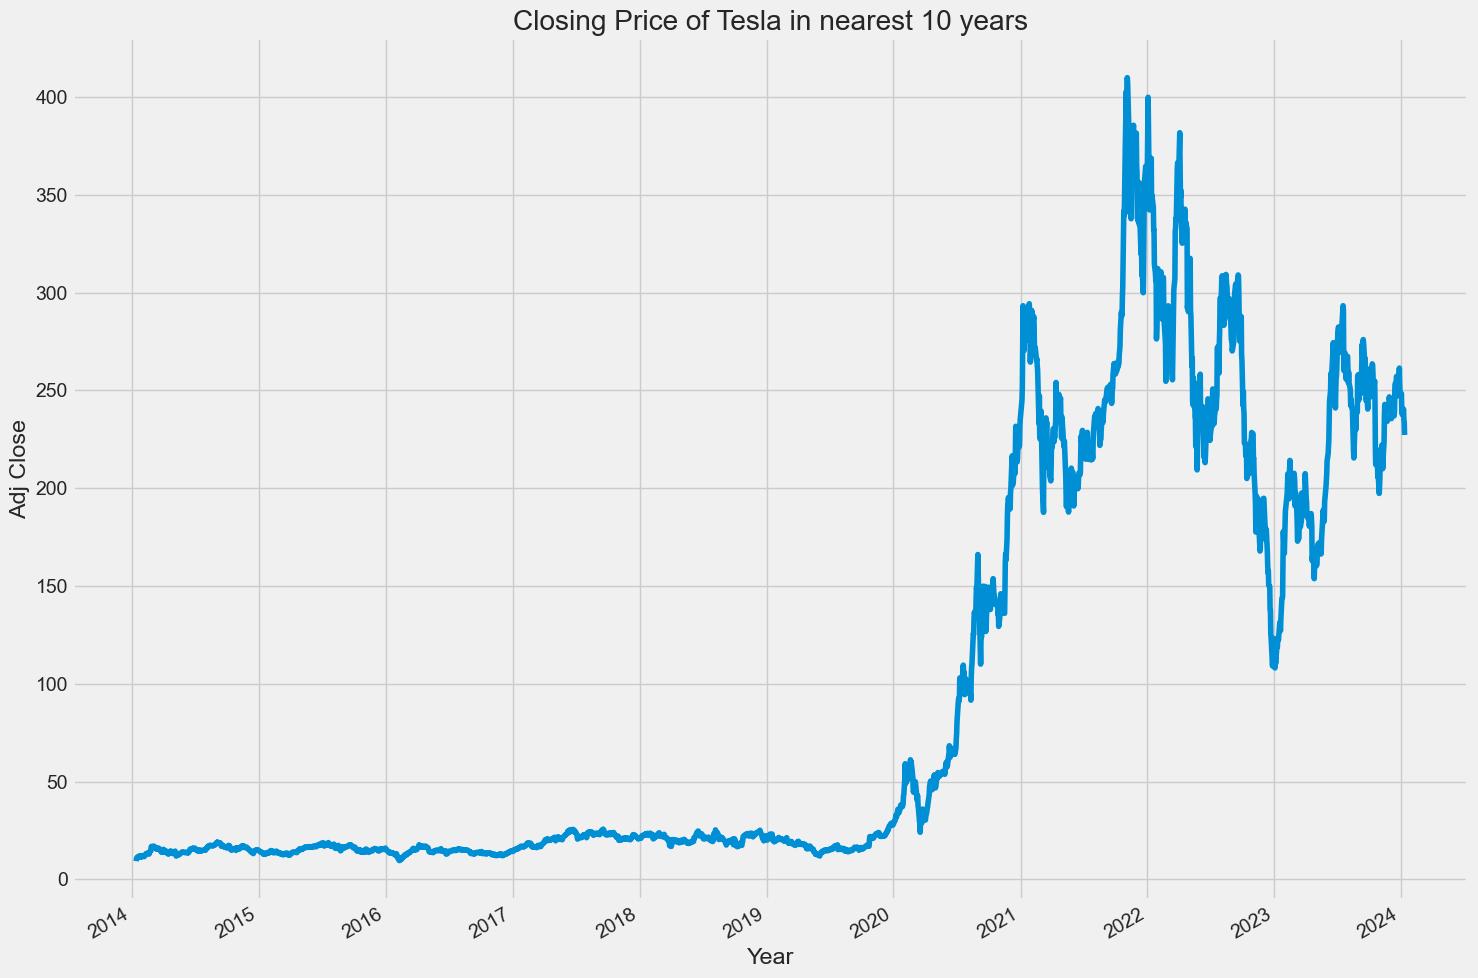

In [16]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel('Year')
plt.title(f"Closing Price of {df['Company'][0]} in nearest 10 years")
    
plt.tight_layout()

**Volume of Sales**

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

C:\Users\nguye\AppData\Local\Temp\ipykernel_17244\3804939772.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Sales Volume of {df['Company'][0]} in nearest 10 years")


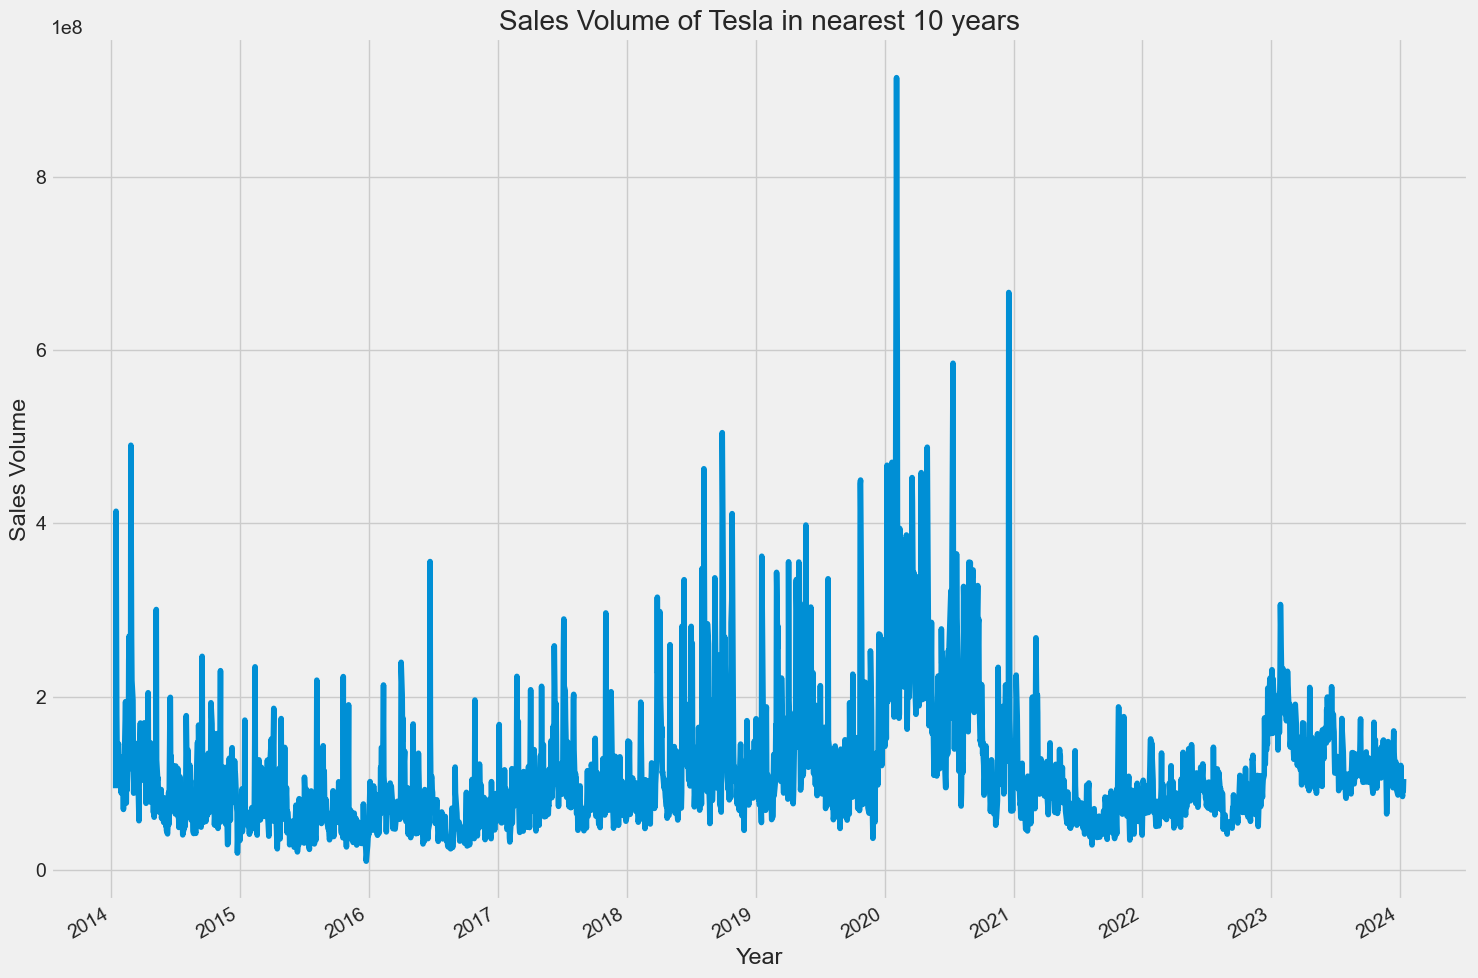

In [17]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))

df['Volume'].plot()
plt.ylabel('Sales Volume')
plt.xlabel('Year')
plt.title(f"Sales Volume of {df['Company'][0]} in nearest 10 years")
    
plt.tight_layout()

### 2. What was the daily return of the stock on average?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.


C:\Users\nguye\AppData\Local\Temp\ipykernel_17244\2411397037.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Adj Close of {df['Company'][0]} in nearest 10 years")


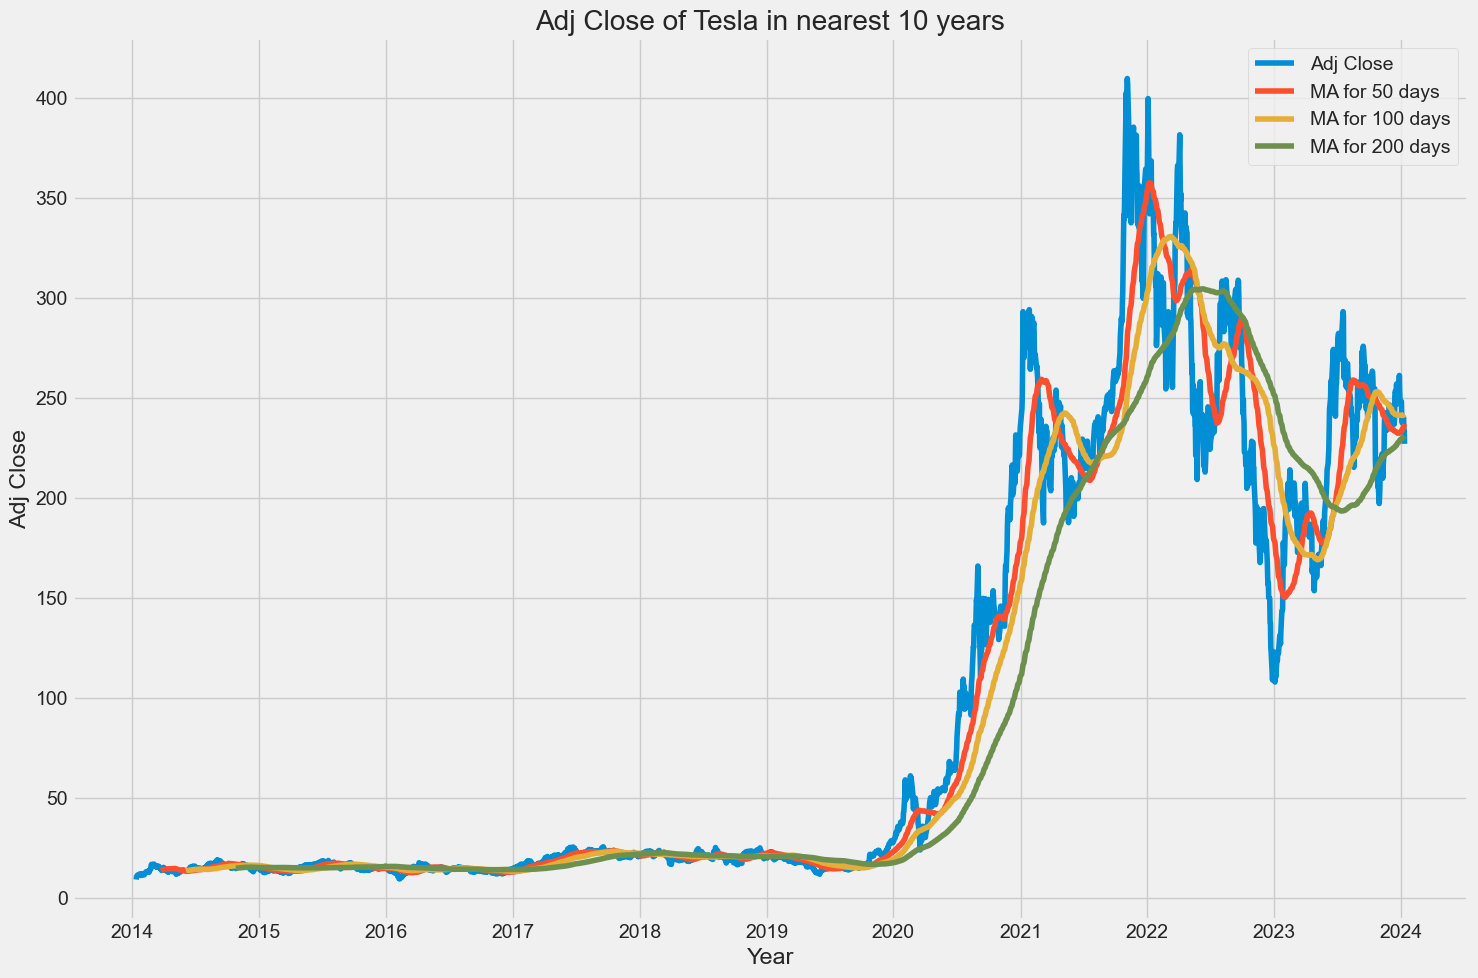

In [18]:
ma_day = [50,100, 200]

for ma in ma_day:
    column_name = f'MA for {ma} days'
    df[column_name] = df['Adj Close'].rolling(ma).mean()
    
plt.figure(figsize=(15, 10))
plt.plot(df[['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']])
plt.legend(['Adj Close', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days'])
plt.ylabel('Adj Close')
plt.xlabel('Year')
plt.title(f"Adj Close of {df['Company'][0]} in nearest 10 years")

plt.tight_layout()

### 3. How can we attempt to predict future stock behavior? 

To predict stock of Tesla, I will use LTSM on closing price.

Text(0, 0.5, 'Close Prize in USD')

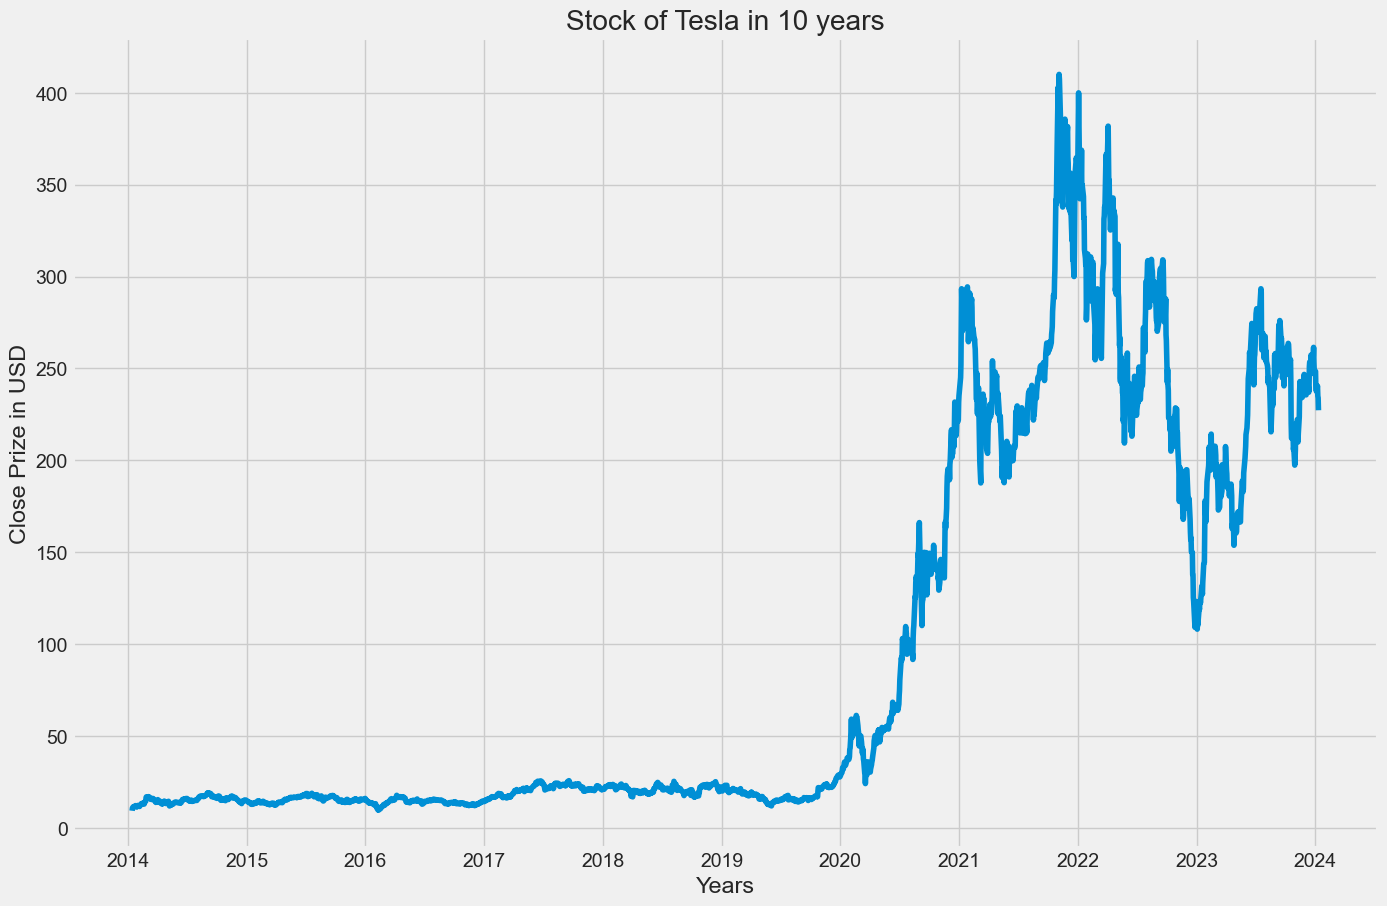

In [19]:
plt.figure(figsize=(15,10))
plt.title('Stock of Tesla in 10 years')
plt.plot(df['Close'])
plt.xlabel('Years')
plt.ylabel('Close Prize in USD')

In [20]:
data = df.filter(['Close'])
print(data)
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

                 Close
Date                  
2014-01-13    9.289333
2014-01-14   10.751333
2014-01-15   10.942000
2014-01-16   11.398000
2014-01-17   11.334000
...                ...
2024-01-05  237.490005
2024-01-08  240.449997
2024-01-09  234.960007
2024-01-10  233.940002
2024-01-11  227.220001

[2517 rows x 1 columns]


In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [22]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 33s 13ms/step - loss: 0.0018


In [24]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 17ms/step


11.085174850464997

C:\Users\nguye\AppData\Local\Temp\ipykernel_17244\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


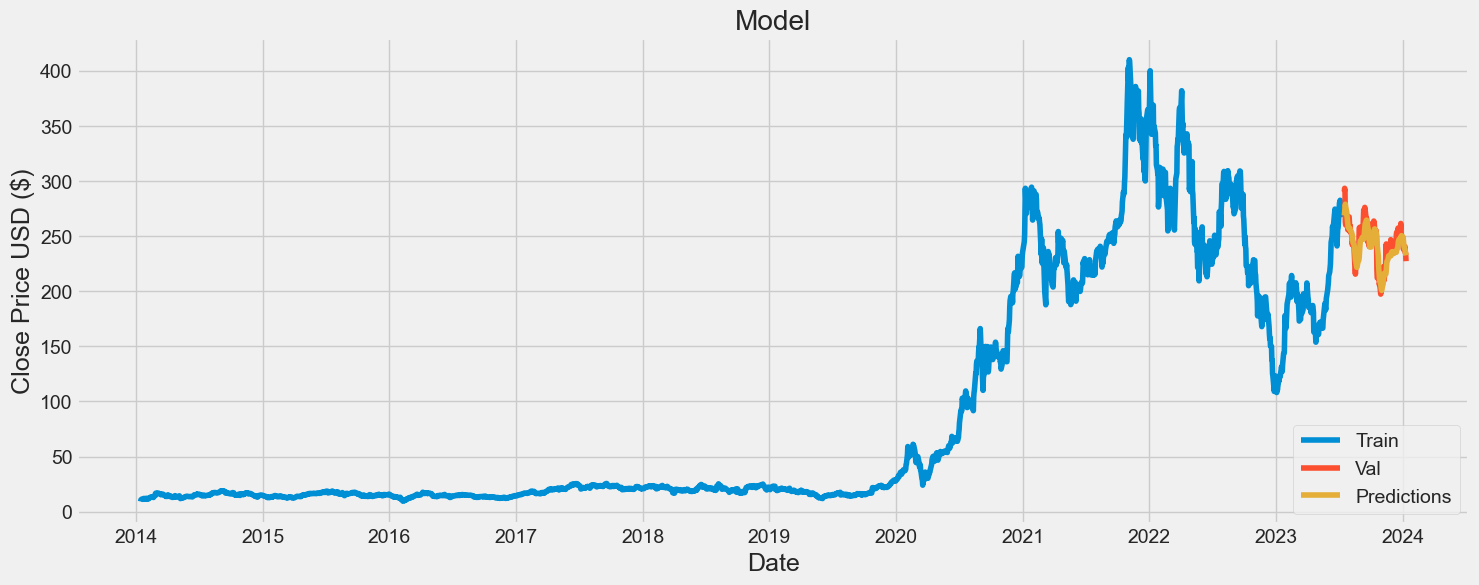

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()